In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from random import randint
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Flatten
from keras.layers import Dense,Input
from keras.models import Sequential
from keras.models import Model
from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
train1 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train1\\"
train2 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train2\\"
train = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train\\"
test = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\"

In [3]:
filenames = sorted(os.listdir(train1))
p4=0
d4=[]
for img_name in filenames:
    img = plt.imread(train1 + img_name)
    img  = np.resize(img, (256, 256))
    if p4==0:
      imgs4=(img)
      p4=1
    else:
      imgs4 = np.append(imgs4, img, axis=0)
    res = img_name[:3]
    d4.append(res)
print(d4)
    
print(imgs4.shape)
        
img_data = np.array(imgs4)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'

(76800, 256)

In [4]:
imgs4 = np.reshape(imgs4, [ 300, 256, 256])
train_images, test_images = train_test_split(imgs4,test_size=0.33, random_state=42)
nRows,nCols = train_images.shape[1:]
nDims = nRows
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(train_images.shape)
print(test_images.shape)

(201, 256, 256)
(99, 256, 256)


In [5]:
imgs = np.reshape(imgs4, [ 300, 256, 256])
train_images, test_images, train_labels, test_labels = train_test_split(imgs4, d4, test_size=0.33, random_state=42)
print('Training data shape : ', train_images.shape, len(train_labels))
print('Testing data shape : ', test_images.shape, len(test_labels))
classes = np.unique(train_labels)
#classes=np.append(classes,0)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (201, 256, 256) 201
Testing data shape :  (99, 256, 256) 99
Total number of outputs :  4
Output classes :  ['cat' 'dog' 'hor' 'hum']


In [6]:
train_labels=[0 if x=='cat' else 1 for x in train_labels]
print(train_labels)
len(train_labels)

[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]


201

In [7]:
test_labels=[0 if x=='cat' else 1 for x in test_labels]
print(test_labels)
len(test_labels)

[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


99

In [8]:
from keras.utils import to_categorical

nRows,nCols = train_images.shape[1:]
nDims = nRows
print(nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(len(train_labels))
print(len(test_labels))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label : ', train_labels[56])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[56])
print('Original label : ', test_labels[56])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[56])

256
201
99
Original label :  1
After conversion to categorical ( one-hot ) :  [0. 1.]
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0.]


In [9]:
input = Input(shape =(256,256, 1))
x = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x = MaxPool2D(pool_size=(2,2))(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Conv2D(128, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2,2))(x)
x = Conv2D(256, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.2)(x)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
layer1 = Flatten()(x)
layer1 = Dense(256, activation = 'relu')(layer1)
layer1 = Dense(128, activation = 'relu')(layer1)
layer1 = Dense(2, activation = 'softmax')(layer1)
model = Model(input,layer1)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [12]:
history1 = model.fit(train_data,train_labels_one_hot,batch_size=32,epochs=20,validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.cast instead.
Train on 201 samples, validate on 99 samples
Epoch 1/20
201/201 [==============================] - 35s 175ms/step - loss: 0.6575 - acc: 0.7015 - val_loss: 0.4149 - val_acc: 0.9192
Epoch 2/20
201/201 [==============================] - 24s 120ms/step - loss: 0.4332 - acc: 0.8756 - val_loss: 0.2883 - val_acc: 0.9091
Epoch 3/20
201/201 [==============================] - 23s 113ms/step - loss: 0.3306 - acc: 0.8905 - val_loss: 0.2746 - val_acc: 0.9192
Epoch 4/20
201/201 [==============================] - 23s 114ms/step - loss: 0.3386 - acc: 0.8905 - val_loss: 0.2795 - val_acc: 0.9192
Epoch 5/20
201/201 [==============================] - 23s 114ms/step - loss: 0.3170 - acc: 0.8905 - val_loss: 0.2870 - val_acc: 0.9192
Epoch 6/20
201/201 [==============================] - 24s 121ms/step - loss: 0.3226 - acc: 0.8905 - val_loss: 0.2545 - val_acc: 0.9192
Epoch 7/20
201/201 [==============================] - 27s 135ms/step - loss: 0.3091 - acc: 0.8905

Text(0.5, 1.0, 'Accuracy Curves')

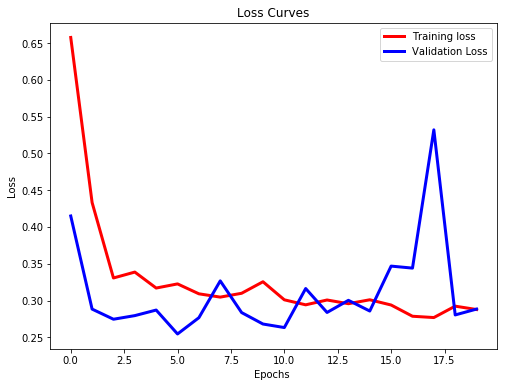

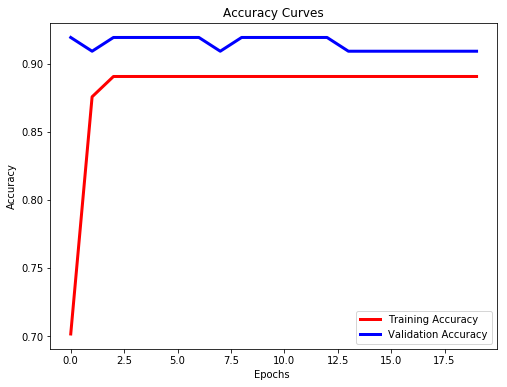

In [13]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

In [14]:
model.save_weights('classification_conv.h5')

In [15]:
net = Conv2D(32,(3,3),activation ='relu',padding='same')(x)
net = BatchNormalization()(net)
net = Conv2D(32,(3,3),activation ='relu',padding='same')(net)
net = BatchNormalization()(net)
net= MaxPool2D(pool_size=(2,2))(net)
net = Conv2D(64,(3,3),activation ='relu',padding='same')(net)
net = BatchNormalization()(net)
net = Conv2D(64,(3,3),activation ='relu',padding='same')(net)

net1 = Conv2D(32,(3,3),activation ='relu',padding='same')(net)
net1 = BatchNormalization()(net1)
net1 = Conv2D(32,(3,3),activation ='relu',padding='same')(net1)
net1 = UpSampling2D((2,2))(net1)
decoded = Conv2D(1,(3,3),activation = 'sigmoid',padding ='same')(net1)

flat =Flatten()(decoded)
out = Dense(2, activation='softmax')(flat)

In [16]:
autoencoder = Model(input, out)
autoencoder.compile(loss ='mean_squared_error',optimizer ='rmsprop',metrics =['accuracy'])

In [17]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
__________

In [18]:
for l1,l2 in zip(autoencoder.layers[:10],model.layers[0:10]):
    l1.set_weights(l2.get_weights())

In [19]:
for layer in autoencoder.layers[0:10]:
    layer.trainable =False

In [20]:
classify_train = autoencoder.fit(train_data,train_labels_one_hot,batch_size=32,epochs=10,verbose=1,validation_data = (test_data,test_labels_one_hot))

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 201 samples, validate on 99 samples
Epoch 1/10
201/201 [==============================] - 28s 141ms/step - loss: 0.1614 - acc: 0.7960 - val_loss: 0.3040 - val_acc: 0.2929
Epoch 2/10
201/201 [==============================] - 32s 160ms/step - loss: 0.1049 - acc: 0.8756 - val_loss: 0.0927 - val_acc: 0.9192
Epoch 3/10
201/201 [==============================] - 32s 158ms/step - loss: 0.0991 - acc: 0.8905 - val_loss: 0.0732 - val_acc: 0.9192
Epoch 4/10
201/201 [==============================] - 31s 153ms/step - loss: 0.0968 - acc: 0.8905 - val_loss: 0.0727 - val_acc: 0.9192
Epoch 5/10
201/201 [==============================] - 24s 121ms/step - loss: 0.0958 - acc: 0.8905 - val_loss: 0.0745 - val_acc: 0.9192
Epoch 6/10
201/201 [==============================] - 22s 110ms/step - loss: 0.0928 - acc: 0.8905 - val_loss: 0.1131 - val_acc: 0.9192
Epoch 7/10
201/201 [==============================] - 23s 113ms/step - loss: 0.0961 - acc: 0.8905 - val_loss: 0.0811 - val_acc: 0.9192
Epoch 8/10

In [37]:
'''from keras.models import *
from keras.layers import *
from keras.models import Sequential

autoencoder.layers.pop()
autoencoder.outputs = [autoencoder.layers[-1].output]'''

'from keras.models import *\nfrom keras.layers import *\nfrom keras.models import Sequential\n\nautoencoder.layers.pop()\nautoencoder.outputs = [autoencoder.layers[-1].output]'

In [39]:
 '''top_model = Sequential()
  top_model.add(Dense(2, activation='softmax'))
  model2 = Model(input= autoencoder.input, output= top_model(autoencoder.output))'''

"top_model = Sequential()\n top_model.add(Dense(2, activation='softmax'))\n model2 = Model(input= autoencoder.input, output= top_model(autoencoder.output))"

In [40]:
'''model2.compile(loss ='categorical_crossentropy',optimizer ='rmsprop',metrics =['accuracy'])'''

"model2.compile(loss ='categorical_crossentropy',optimizer ='rmsprop',metrics =['accuracy'])"

In [41]:
layer2 = Flatten()(net)
layer2 = Dense(256, activation = 'relu')(layer2)
layer2 = Dense(128, activation = 'relu')(layer2)
layer2 = Dense(2, activation = 'softmax')(layer2)
model3 = Model(input,layer2)

In [42]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
__________

In [45]:
for l1,l2 in zip(model3.layers[:18],autoencoder.layers[0:18]):
    l1.set_weights(l2.get_weights())

In [46]:
for layer in model3.layers[0:18]:
    layer.trainable =False

In [47]:
model3.compile(loss='categorical_crossentropy',optimizer ='adam',metrics =['accuracy'] )

In [48]:
classify_train1 = model3.fit(train_data,train_labels_one_hot,batch_size=32,epochs=10,verbose=1,validation_data = (test_data,test_labels_one_hot))

Train on 201 samples, validate on 99 samples
Epoch 1/10
201/201 [==============================] - 8s 38ms/step - loss: 0.9284 - acc: 0.7711 - val_loss: 0.8906 - val_acc: 0.9192
Epoch 2/10
201/201 [==============================] - 8s 38ms/step - loss: 0.4355 - acc: 0.8756 - val_loss: 0.3683 - val_acc: 0.9192
Epoch 3/10
201/201 [==============================] - 8s 39ms/step - loss: 0.3559 - acc: 0.8905 - val_loss: 0.3694 - val_acc: 0.9293
Epoch 4/10
201/201 [==============================] - 8s 39ms/step - loss: 0.3654 - acc: 0.8856 - val_loss: 0.5459 - val_acc: 0.9192
Epoch 5/10
201/201 [==============================] - 8s 41ms/step - loss: 0.3106 - acc: 0.8955 - val_loss: 0.3856 - val_acc: 0.9192
Epoch 6/10
201/201 [==============================] - 8s 40ms/step - loss: 0.3327 - acc: 0.8905 - val_loss: 0.4122 - val_acc: 0.8586
Epoch 7/10
201/201 [==============================] - 8s 41ms/step - loss: 0.2945 - acc: 0.8856 - val_loss: 0.6516 - val_acc: 0.9192
Epoch 8/10
201/201 [====

Text(0.5, 1.0, 'Accuracy Curves')

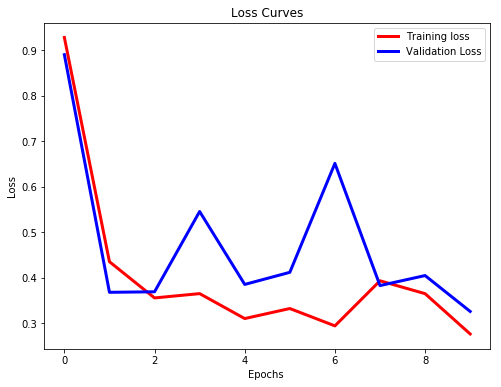

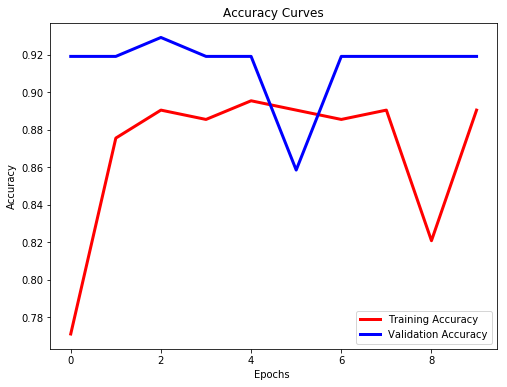

In [49]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(classify_train1.history['loss'],'r',linewidth=3.0)
plt.plot(classify_train1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(classify_train1.history['acc'],'r',linewidth=3.0)
plt.plot(classify_train1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

In [50]:
model3.evaluate(test_data,test_labels_one_hot)

99/99 [==============================] - 2s 24ms/step


[0.32623843171379785, 0.9191919191919192]

In [65]:
imgcat=cv2.imread("C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\1.jpg")
imgdog=cv2.imread("C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\35.jpg")
imgcat=cv2.resize(imgcat,(256,256))
imgcat = cv2.cvtColor(cv2.resize(imgcat,(256,256)),cv2.COLOR_BGR2GRAY)
imgcat=imgcat.reshape(1,256,256,1)
imgdog=cv2.resize(imgdog,(256,256))
imgdog = cv2.cvtColor(cv2.resize(imgdog,(256,256)),cv2.COLOR_BGR2GRAY)
imgdog=imgdog.reshape(1,256,256,1)
images=([imgcat])
prediction=model3.predict([imgcat],steps=1)

In [66]:
prediction

array([[1.0000000e+00, 1.0438349e-20]], dtype=float32)

In [ ]:
prediction

In [93]:
model.evaluate(test_data,test_labels_one_hot)

99/99 [==============================] - 2s 20ms/step


[0.28204989124729174, 0.9191919191919192]

In [94]:
filenames1 = sorted(os.listdir(train2))
p3=0
d3=[]
for img_name in filenames1:
    img = plt.imread(train2 + img_name)
    img  = np.resize(img, (256, 256))
    if p3==0:
      imgs1=(img)
      p3 = 1
    else:
      imgs1 = np.append(imgs1, img, axis=0)
    res = img_name[:3]
    d3.append(res)
print(d3)
    
print(imgs1.shape)
        
img_data1 = np.array(imgs1)
img_data1 = img_data.astype('float32')
img_data1 = img_data/255
img_data1.shape

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog'

(76800, 256)

In [95]:
imgs1 = np.reshape(imgs1, [ 300, 256, 256])
train_images1, test_images1, train_labels1, test_labels1 = train_test_split(imgs1, d3, test_size=0.33, random_state=42)
print('Training data shape : ', train_images1.shape, len(train_labels1))
print('Testing data shape : ', test_images1.shape, len(test_labels1))
classes = np.unique(train_labels1)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (201, 256, 256) 201
Testing data shape :  (99, 256, 256) 99
Total number of outputs :  4
Output classes :  ['cat' 'dog' 'hor' 'hum']


In [96]:
train_labels1=[0 if x=='dog' else 1 for x in train_labels1]
print(train_labels1)
len(train_labels1)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]


201

In [97]:
test_labels1=[0 if x=='dog' else 1 for x in test_labels1]
print(test_labels1)
len(test_labels1)

[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]


99

In [104]:
from keras.utils import to_categorical

nRows,nCols = train_images1.shape[1:]
nDims = nRows
print(nCols)
train_data1 = train_images1.reshape(train_images1.shape[0], nRows, nCols, 1)
test_data1 = test_images1.reshape(test_images1.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data1 = train_data1.astype('float32')
test_data1 = test_data1.astype('float32')
train_data1 /= 255
test_data1 /= 255
print(len(train_labels1))
print(len(test_labels1))
train_labels_one_hot1 = to_categorical(train_labels1)
test_labels_one_hot1 = to_categorical(test_labels1)
print('Original label : ', train_labels1[56])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot1[56])
print('Original label : ', test_labels1[56])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot1[56])

256
201
99
Original label :  1
After conversion to categorical ( one-hot ) :  [0. 1.]
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0.]


In [98]:
input = Input(shape =(256,256, 1))
x1 = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1) 
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = Dropout(0.2)(x1)

In [102]:
layer2 = Flatten()(x1)
layer2 = Dense(128, activation = 'relu')(layer2)
layer2 = Dense(2, activation = 'softmax')(layer2)
model1 = Model(input,layer2)

In [103]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [105]:
history4 = model1.fit(train_data1,train_labels_one_hot1,batch_size=1,epochs=5,validation_data=(test_data1, test_labels_one_hot1))

Train on 201 samples, validate on 99 samples
Epoch 1/5
201/201 [==============================] - 64s 317ms/step - loss: 0.9353 - acc: 0.7463 - val_loss: 0.3929 - val_acc: 0.8283
Epoch 2/5
201/201 [==============================] - 63s 313ms/step - loss: 0.5110 - acc: 0.8955 - val_loss: 0.3582 - val_acc: 0.8788
Epoch 3/5
201/201 [==============================] - 63s 315ms/step - loss: 0.3804 - acc: 0.9005 - val_loss: 0.3490 - val_acc: 0.8788
Epoch 4/5
201/201 [==============================] - 60s 298ms/step - loss: 0.4278 - acc: 0.8856 - val_loss: 0.6716 - val_acc: 0.6667
Epoch 5/5
201/201 [==============================] - 58s 289ms/step - loss: 0.4978 - acc: 0.7662 - val_loss: 0.4296 - val_acc: 0.8788


In [107]:
prediction1=model1.predict([imgcat],steps=1)
prediction1

array([[1., 0.]], dtype=float32)

In [108]:
model1.evaluate(test_data1,test_labels_one_hot1)

99/99 [==============================] - 2s 21ms/step


[0.4295581778078669, 0.8787878787878788]

In [151]:
from keras.layers import Activation

input_shape =(256,256,1)
x.trainable= False
x1.trainable= False
a = Flatten()(x)
a = Activation('relu')(a)
#a = Dense(128,activation='relu')(a)
b = Flatten()(x1)
b = Activation('relu')(b)
#b = Dense(128,activation='relu')(b)
mergedOut = concatenate([a,b], axis = 0)
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(128, activation='relu')(mergedOut)
mergedOut = Dense(2, activation = 'softmax')(mergedOut)

In [150]:
model4 = Model(input,mergedOut)

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_4:0", shape=(?, 256, 256, 1), dtype=float32) at layer "input_4". The following previous layers were accessed without issue: ['input_5']

In [51]:
model3.predict(test)

AttributeError: 'str' object has no attribute 'ndim'